In [96]:
import numpy as np
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

# Testing GARCH

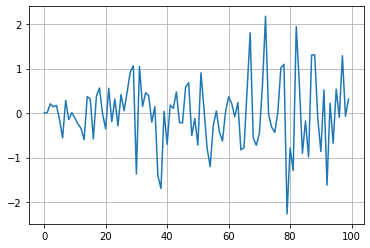

In [118]:
# create dataset
variance = np.arange(0, 1, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [119]:
n_test = 10

train, test = data[:-n_test], data[-n_test:]

In [120]:
p = 1
q = 1

In [121]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [122]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 167.66636128587535
Iteration:      2,   Func. Count:     15,   Neg. LLF: 144.57046078622162
Iteration:      3,   Func. Count:     20,   Neg. LLF: 92.08856780899288
Iteration:      4,   Func. Count:     24,   Neg. LLF: 92.83510768340642
Iteration:      5,   Func. Count:     29,   Neg. LLF: 92.06116392651603
Iteration:      6,   Func. Count:     33,   Neg. LLF: 92.04447195693456
Iteration:      7,   Func. Count:     37,   Neg. LLF: 92.04013299057421
Iteration:      8,   Func. Count:     41,   Neg. LLF: 92.03970331120367
Iteration:      9,   Func. Count:     45,   Neg. LLF: 92.03969013046712
Iteration:     10,   Func. Count:     48,   Neg. LLF: 92.03968994377078
Optimization terminated successfully    (Exit mode 0)
            Current function value: 92.03969013046712
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10


In [123]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.011
Vol Model:                      GARCH   Log-Likelihood:               -92.0397
Distribution:                  Normal   AIC:                           190.079
Method:            Maximum Likelihood   BIC:                           197.579
                                        No. Observations:                   90
Date:                Sat, Oct 09 2021   Df Residuals:                       90
Time:                        19:13:51   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0138      1.

In [124]:
fitted.params

omega       0.013844
alpha[1]    0.140281
beta[1]     0.859719
Name: params, dtype: float64

In [129]:
fitted.forecast(reindex=False, horizon=n_test).variance.values[0]

array([1.23206656, 1.24591088, 1.25975519, 1.27359951, 1.28744383,
       1.30128814, 1.31513246, 1.32897678, 1.34282109, 1.35666541])

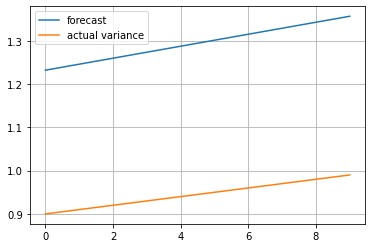

In [131]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [95]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim